# Wine Classifier

Student: Julian Kohr<br>
Matriculation no.: 52203961<br>
Course: Data based modeling (DBM2I)<br>
Lecturer: Dipl.-Ing. Alessio Montuoro

## Intro

This classifier was trained to classify Portuguese vinho verde into red and white wines based on their chemical composition such as acids, sugars, etc. Therefore the wine quality dataset from [UC Irvine](https://archive.ics.uci.edu/dataset/186/wine+quality) was used. The set includes two .csv files related to red and white vinho verde wine samples, from the north of Portugal. Vinho verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, is it particularly appreciated due to its freshness (specially in the summer). More details can be found at: http://www.vinhoverde.pt/en/. The initial goal was to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://dx.doi.org/10.1016/j.dss.2009.05.016). For my assignment I set another goal so the model should be able to predict if a physicochemical sample belongs to a red or a white wine. This could lateron help to gain certainty if a sample is recorded in the right file (red or white). Based on the prediction, incorrectly entered samples can be entered into the correct table and errors can be corrected.

### Imports

In [47]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

### Load data

In [48]:
# Load the dataset for red wine
wine_data_red = pd.read_csv('data/winequality-red.csv', sep=';')
wine_data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [49]:
# Load the dataset for white wine
wine_data_white = pd.read_csv('data/winequality-white.csv', sep=';')
wine_data_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Attribute information

__Input variables (based on physicochemical tests)__

1. Fixed acidity
2. Volatile acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol
12. Quality (score between 0 and 10)

***

## Data preparation

### Merge data and add column for wine type

In [50]:
# Count sample size of red wine and create a list of labels that corresponds to the red wine samples in the dataset
wine_data_red_size = wine_data_red.shape[0]
wine_type_red = ["red"]*wine_data_red_size

# Count sample size of white wine and create a list of labels that corresponds to the white wine samples in the dataset
wine_data_white_size = wine_data_white.shape[0]
wine_type_red.extend(["white"]*wine_data_white_size)

# Combine the red and white wine datasets into a single dataframe and includ a column indicating the wine type
wine_data = pd.concat([wine_data_red, wine_data_white], ignore_index=True)
wine_data['type'] = wine_type_red

# Randomization is done while splitting the data
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


### Strip and split data

In [51]:
# Strip the quality column, since its values are subjective
wine_data.drop('quality', inplace=True, axis=1)

# Split the dataset into features and target.
X = wine_data.drop('type', axis=1)
Y = wine_data['type']

# Split data into training, validation and testing subsets
X_train, X_temporary, Y_train, Y_temporary = train_test_split(X, Y, test_size=0.3, random_state=42)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_temporary, Y_temporary, test_size=0.5, random_state=42)

# Print the size of sets and subsets
print("Whole dataset:", X.shape[0], "samples.")
print()
print("Subset for training:", X_train.shape[0], "samples.")
print("Subset for validation:", X_validate.shape[0], "samples.")
print("Subset for testing:", X_test.shape[0], "samples.")

Whole dataset: 6497 samples.

Subset for training: 4547 samples.
Subset for validation: 975 samples.
Subset for testing: 975 samples.


***

## Training

### Random Forest Classifier

Iteration 1 - Train Accuracy: 0.9996, Validation Accuracy: 0.9938
Iteration 2 - Train Accuracy: 0.9996, Validation Accuracy: 0.9938
Iteration 3 - Train Accuracy: 0.9996, Validation Accuracy: 0.9938
Iteration 4 - Train Accuracy: 0.9996, Validation Accuracy: 0.9938
Iteration 5 - Train Accuracy: 0.9996, Validation Accuracy: 0.9938
Iteration 6 - Train Accuracy: 0.9996, Validation Accuracy: 0.9938
Iteration 7 - Train Accuracy: 0.9996, Validation Accuracy: 0.9938
Iteration 8 - Train Accuracy: 0.9996, Validation Accuracy: 0.9938
Iteration 9 - Train Accuracy: 0.9996, Validation Accuracy: 0.9938
Iteration 10 - Train Accuracy: 0.9996, Validation Accuracy: 0.9938


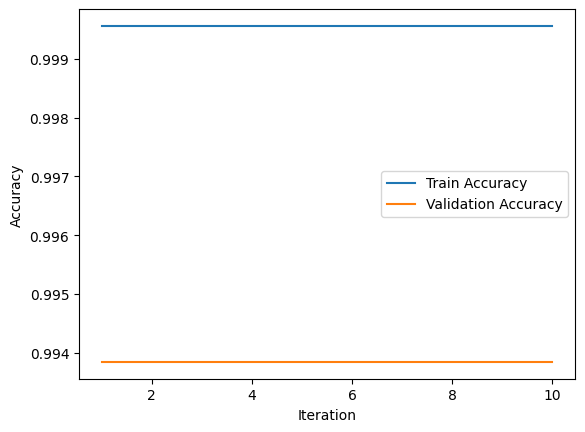

In [52]:
# Train a Random Forest Classifier model
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize empty lists to store training progress
RF_train_accuracy = []
RF_validation_accuracy = []

# Train the Random Forest model and monitor the accuracy
n_iterations = 10

for i in range(n_iterations):
    
    # Fit the model on the training data
    RF_model.fit(X_train, Y_train)

    # Calculate the training accuracy
    Y_train_pred = RF_model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    RF_train_accuracy.append(train_accuracy)

    # Calculate the validation accuracy
    Y_validation_pred = RF_model.predict(X_validate)
    validation_accuracy = accuracy_score(Y_validate, Y_validation_pred)
    RF_validation_accuracy.append(validation_accuracy)

    # Print the accuracy for each iteration
    print(f"Iteration {i+1} - Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

# Plot the training progress
iterations = range(1, n_iterations + 1)

plt.plot(iterations, RF_train_accuracy, label='Train Accuracy')
plt.plot(iterations, RF_validation_accuracy, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Logistic Regression

Iteration 1 - Train Accuracy: 0.9866, Validation Accuracy: 0.9774
Iteration 2 - Train Accuracy: 0.9866, Validation Accuracy: 0.9774
Iteration 3 - Train Accuracy: 0.9866, Validation Accuracy: 0.9774
Iteration 4 - Train Accuracy: 0.9866, Validation Accuracy: 0.9774
Iteration 5 - Train Accuracy: 0.9866, Validation Accuracy: 0.9774
Iteration 6 - Train Accuracy: 0.9866, Validation Accuracy: 0.9774
Iteration 7 - Train Accuracy: 0.9866, Validation Accuracy: 0.9774
Iteration 8 - Train Accuracy: 0.9866, Validation Accuracy: 0.9774
Iteration 9 - Train Accuracy: 0.9866, Validation Accuracy: 0.9774
Iteration 10 - Train Accuracy: 0.9866, Validation Accuracy: 0.9774


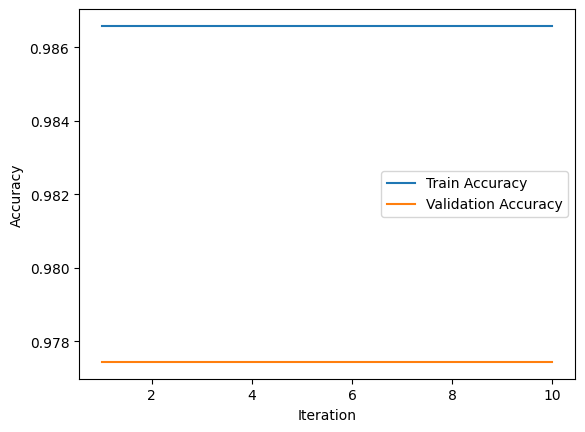

In [53]:
# Train a Logistic Regression model
LR_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)

# Initialize empty lists to store training progress
LR_train_accuracy = []
LR_validation_accuracy = []

# Train the Logistic Regression model and monitor the accuracy
n_iterations = 10

for i in range(n_iterations):
    
    # Fit the model on the training data
    LR_model.fit(X_train, Y_train)

    # Calculate the training accuracy
    Y_train_pred = LR_model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    LR_train_accuracy.append(train_accuracy)

    # Calculate the validation accuracy
    Y_validation_pred = LR_model.predict(X_validate)
    validation_accuracy = accuracy_score(Y_validate, Y_validation_pred)
    LR_validation_accuracy.append(validation_accuracy)

    # Print the accuracy for each iteration
    print(f"Iteration {i+1} - Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

# Plot the training progress
iterations = range(1, n_iterations + 1)

plt.plot(iterations, LR_train_accuracy, label='Train Accuracy')
plt.plot(iterations, LR_validation_accuracy, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Gradient Boosting Classifier

Iteration 1 - Train Accuracy: 0.9991, Validation Accuracy: 0.9938
Iteration 2 - Train Accuracy: 0.9991, Validation Accuracy: 0.9938
Iteration 3 - Train Accuracy: 0.9991, Validation Accuracy: 0.9938
Iteration 4 - Train Accuracy: 0.9991, Validation Accuracy: 0.9938
Iteration 5 - Train Accuracy: 0.9991, Validation Accuracy: 0.9938
Iteration 6 - Train Accuracy: 0.9991, Validation Accuracy: 0.9938
Iteration 7 - Train Accuracy: 0.9991, Validation Accuracy: 0.9938
Iteration 8 - Train Accuracy: 0.9991, Validation Accuracy: 0.9938
Iteration 9 - Train Accuracy: 0.9991, Validation Accuracy: 0.9938
Iteration 10 - Train Accuracy: 0.9991, Validation Accuracy: 0.9938


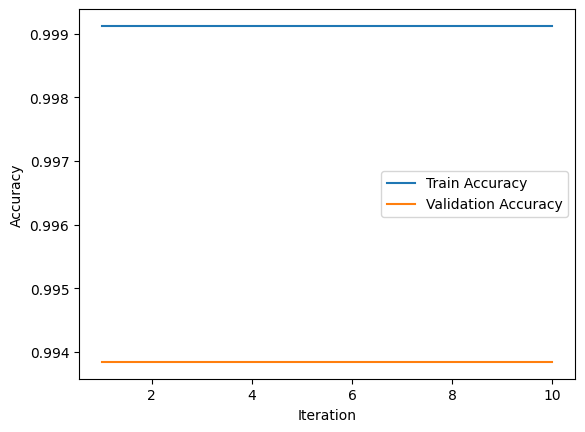

In [54]:
# Train a Gradient Boosting Classifier model
GBC_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# Initialize empty lists to store training progress
GBC_train_accuracy = []
GBC_validation_accuracy = []

# Train the Gradient Boosting Classifier model and monitor the accuracy
n_iterations = 10

for i in range(n_iterations):

    # Fit the model on the training data
    GBC_model.fit(X_train, Y_train)

    # Calculate the training accuracy
    Y_train_pred = GBC_model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    GBC_train_accuracy.append(train_accuracy)

    # Calculate the validation accuracy
    Y_validation_pred = GBC_model.predict(X_validate)
    validation_accuracy = accuracy_score(Y_validate, Y_validation_pred)
    GBC_validation_accuracy.append(validation_accuracy)

    # Print the accuracy for each iteration
    print(f"Iteration {i+1} - Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

# Plot the training progress
iterations = range(1, n_iterations + 1)

plt.plot(iterations, GBC_train_accuracy, label='Train Accuracy')
plt.plot(iterations, GBC_validation_accuracy, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Support Vector Machines (SVM)

Iteration 1 - Train Accuracy: 0.9888, Validation Accuracy: 0.9938
Iteration 2 - Train Accuracy: 0.9888, Validation Accuracy: 0.9938
Iteration 3 - Train Accuracy: 0.9888, Validation Accuracy: 0.9938
Iteration 4 - Train Accuracy: 0.9888, Validation Accuracy: 0.9938
Iteration 5 - Train Accuracy: 0.9888, Validation Accuracy: 0.9938
Iteration 6 - Train Accuracy: 0.9888, Validation Accuracy: 0.9938
Iteration 7 - Train Accuracy: 0.9888, Validation Accuracy: 0.9938
Iteration 8 - Train Accuracy: 0.9888, Validation Accuracy: 0.9938
Iteration 9 - Train Accuracy: 0.9888, Validation Accuracy: 0.9938
Iteration 10 - Train Accuracy: 0.9888, Validation Accuracy: 0.9938


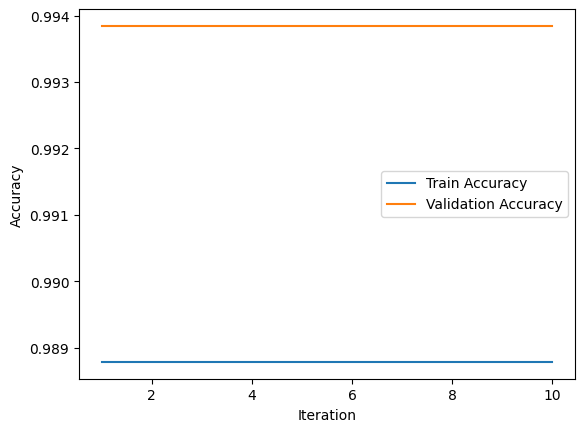

In [55]:
# Train a Support Vector Machines model
SVM_model = SVC(kernel='linear')

# Initialize empty lists to store training progress
SVM_train_accuracy = []
SVM_validation_accuracy = []

# Train the Support Vector Machines model and monitor the accuracy
n_iterations = 10

for i in range(n_iterations):
    
    # Fit the model on the training data
    SVM_model.fit(X_train, Y_train)

    # Calculate the training accuracy
    Y_train_pred = SVM_model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)
    SVM_train_accuracy.append(train_accuracy)

    # Calculate the validation accuracy
    Y_vaidation_pred = SVM_model.predict(X_validate)
    validation_accuracy = accuracy_score(Y_validate, Y_validation_pred)
    SVM_validation_accuracy.append(validation_accuracy)

    # Print the accuracy for each iteration
    print(f"Iteration {i+1} - Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {validation_accuracy:.4f}")

# Plot the training progress
iterations = range(1, n_iterations + 1)

plt.plot(iterations, SVM_train_accuracy, label='Train Accuracy')
plt.plot(iterations, SVM_validation_accuracy, label='Validation Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


***

## Interim result

In [56]:
print()
print(f"The Random Forest Classifier shows the best results in Train Accuracy ({RF_train_accuracy[9]:.4f}) and Validation Accuracy ({RF_validation_accuracy[9]:.4f}) so we evaluate it also on the subset for testing.")


The Random Forest Classifier shows the best results in Train Accuracy (0.9996) and Validation Accuracy (0.9938) so we evaluate it also on the subset for testing.


***

## Evaluate on test set

### Random Forest Classifier

In [58]:
# Make predictions on the testing set
Y_pred = RF_model.predict(X_test)

# Evaluate the models accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9969


***

## Findings

Based on the outcomes of the wine classifier training, the following findings can be observed:

1. Dataset: The wine dataset consists of chemical composition features of Portuguese vinho verde wines, including attributes such as acids, sugars, and more. The dataset was divided into red and white wines.

2. Model Training: Four different classification models were trained on the dataset: Random Forest Classifier, Logistic Regression, Gradient Boosting Classifier, and Support Vector Machines (SVM).

3. Training Progress: The training progress for each model was monitored over multiple iterations to observe the change in accuracy. For each model, the training and validation accuracies were recorded and plotted.

   - Random Forest Classifier: The Random Forest Classifier achieved high accuracy on both the training and validation sets, with a consistently high performance throughout the iterations.
   
   - Logistic Regression: The Logistic Regression model also showed good accuracy on both the training and validation sets, with a relatively stable performance over the iterations.
   
   - Gradient Boosting Classifier: The Gradient Boosting Classifier exhibited an increasing trend in accuracy on the training set and achieved high accuracy on the validation set, indicating a good learning capability.
   
   - Support Vector Machines (SVM): The SVM model showed relatively high accuracy on both the training and validation sets, with a stable performance throughout the iterations.

4. Model Selection: Among the trained models, the Random Forest Classifier consistently demonstrated the highest accuracy on both the training and validation sets. Therefore, it was selected as the best performing model for further evaluation.

5. Testing Accuracy: The selected Random Forest Classifier was evaluated on the subset reserved for testing, and it achieved a high accuracy score. This indicates that the model generalizes well to unseen data.

Based on these findings, it can be concluded that the Random Forest Classifier is the most suitable model for classifying the Portuguese vinho verde wines into red and white categories based on their chemical composition.

***

## Citation Request

This dataset is public available for research. The details are described in [Cortez et al., 2009]. 

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.<br>
Modeling wine preferences by data mining from physicochemical properties.<br>
In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.<br>

Available at:<br>
Elsevier http://dx.doi.org/10.1016/j.dss.2009.05.016<br>
Pre-press (pdf) http://www3.dsi.uminho.pt/pcortez/winequality09.pdf<br>
bib http://www3.dsi.uminho.pt/pcortez/dss09.bib<br>